# Uber Analysis using Python - 
##**Phase I & II - Address Temporal Correlation**

This notebook contains a basic analysis through some visualizations of the Uber Pickups in New York City data set.

The analysis is broken up into 3 sections:
- Data Loading and Preparation.
- Exploration and visualization of pickups from April to September 2014.
- Conclusion.


## 1. Data Loading and Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.1 Loading Modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


### 1.2 Loading Data

In [2]:
#Load the datasets


df_apr14=pd.read_csv("/content/drive/My Drive/DV DATA/uber-raw-data-apr14.csv")
df_may14=pd.read_csv("/content/drive/My Drive/DV DATA/uber-raw-data-may14.csv")
df_jun14=pd.read_csv("/content/drive/My Drive/DV DATA/uber-raw-data-jun14.csv")
df_jul14=pd.read_csv("/content/drive/My Drive/DV DATA/uber-raw-data-jul14.csv")
df_aug14=pd.read_csv("/content/drive/My Drive/DV DATA/uber-raw-data-aug14.csv")
df_sep14=pd.read_csv("/content/drive/My Drive/DV DATA/uber-raw-data-sep14.csv")

#Merge the dataframes into one

df = df_apr14.append([df_may14,df_jun14,df_jul14,df_aug14,df_sep14], ignore_index=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/DV DATA/uber-raw-data-apr14.csv'

### 1.3 Data Preparation

In [ ]:

df.head(10)

Date/Time      Lat      Lon    Base
0  4/1/2014 0:11:00  40.7690 -73.9549  B02512
1  4/1/2014 0:17:00  40.7267 -74.0345  B02512
2  4/1/2014 0:21:00  40.7316 -73.9873  B02512
3  4/1/2014 0:28:00  40.7588 -73.9776  B02512
4  4/1/2014 0:33:00  40.7594 -73.9722  B02512
5  4/1/2014 0:33:00  40.7383 -74.0403  B02512
6  4/1/2014 0:39:00  40.7223 -73.9887  B02512
7  4/1/2014 0:45:00  40.7620 -73.9790  B02512
8  4/1/2014 0:55:00  40.7524 -73.9960  B02512
9  4/1/2014 1:01:00  40.7575 -73.9846  B02512

In [ ]:
print(len(df))

4534327


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Date/Time  object 
 1   Lat        float64
 2   Lon        float64
 3   Base       object 
dtypes: float64(2), object(2)
memory usage: 138.4+ MB


In [ ]:
#Renaming the Date/Time Colomn
df = df.rename(columns={'Date/Time': 'Date_time'})

#Converting the Date_time type into Datetime
df['Date_time'] = pd.to_datetime(df['Date_time'])

#Adding usufull colomns
df['Month'] = df['Date_time'].dt.month_name()
df['Weekday'] = df['Date_time'].dt.day_name()
df['Day'] = df['Date_time'].dt.day
df['Hour'] = df['Date_time'].dt.hour
df['Minute'] = df['Date_time'].dt.minute

In [ ]:
df.head()

Date_time      Lat      Lon    Base  ...  Weekday Day  Hour  Minute
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512  ...  Tuesday   1     0      11
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512  ...  Tuesday   1     0      17
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512  ...  Tuesday   1     0      21
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512  ...  Tuesday   1     0      28
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512  ...  Tuesday   1     0      33

[5 rows x 9 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 9 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date_time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Weekday    object        
 6   Day        int64         
 7   Hour       int64         
 8   Minute     int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 311.3+ MB


In [ ]:
df.describe(include = 'all')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


Date_time           Lat  ...          Hour        Minute
count               4534327  4.534327e+06  ...  4.534327e+06  4.534327e+06
unique               260093           NaN  ...           NaN           NaN
top     2014-04-07 20:21:00           NaN  ...           NaN           NaN
freq                     97           NaN  ...           NaN           NaN
first   2014-04-01 00:00:00           NaN  ...           NaN           NaN
last    2014-09-30 22:59:00           NaN  ...           NaN           NaN
mean                    NaN  4.073926e+01  ...  1.421831e+01  2.940071e+01
std                     NaN  3.994991e-02  ...  5.958759e+00  1.732238e+01
min                     NaN  3.965690e+01  ...  0.000000e+00  0.000000e+00
25%                     NaN  4.072110e+01  ...  1.000000e+01  1.400000e+01
50%                     NaN  4.074220e+01  ...  1.500000e+01  2.900000e+01
75%                     NaN  4.076100e+01  ...  1.900000e+01  4.400000e+01
max                     NaN  4.211660e+01  ...  2.300000e+01  5.900000e+01

[13 rows x 9 columns]

## 2 Exploration and Visualization

Through our exploration we are going to visualize and analyse:
- The number of trips by hour
- The number of trips by month
- The number of trips by weekday
- The number of trips by day


- The number of trips by hour and month
- The number of trips by weekday and hour
- The number of trips by weekday and month



### 2.1 Trips by hour

In [ ]:
#Grouping by Hour 
df_hour_grouped = df.groupby(['Hour']).count()

#Creating the sub dataframe
df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Number_of_trips  24 non-null     int64
dtypes: int64(1)
memory usage: 384.0 bytes


#### Plotting the results

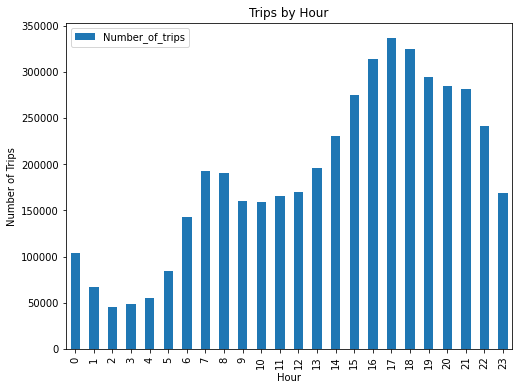

In [ ]:
df_hour.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Hour')

plt.show()

#### Analysing the results

In [ ]:
#The highest number of trips by hour
max_Number_of_trips_hour = max(df_hour['Number_of_trips'])
max_hour = df_hour[df_hour['Number_of_trips'] == 336190].index[0]

print('The highest number of trips by hour is {} trip, that corresponds to the peak hour {}:00.'.format(max_Number_of_trips_hour, max_hour))


The highest number of trips by hour is 336190 trip, that corresponds to the peak hour 17:00.


## **We observe that the number of trips are higher around 16:00 and 18:00, with a spike at 17:00. It matches the end of a working day in the United States (16:30), the time when the workers go home.**

## **We can say that a big part of Uber's clients are workers.**

### 2.2 Trips by month

In [ ]:
#Grouping by Month 
df_month_grouped = df.groupby(['Month'], sort=False).count()

#Creating the sub dataframe
df_month = pd.DataFrame({'Number_of_trips':df_month_grouped.values[:,0]}, index = df_month_grouped.index) 

df_month

Number_of_trips
Month                     
April               564516
May                 652435
June                663844
July                796121
August              829275
September          1028136

#### Plotting the results

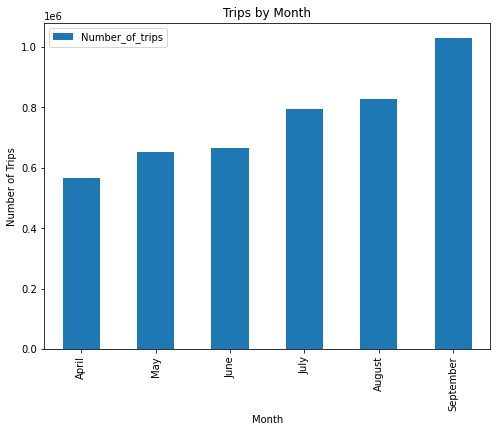

In [ ]:
df_month.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Month')

plt.show()

#### Analysing the results

*italicized text*### We observe that the number of trips increases each month, with a peak 
increase between August and September.



In [ ]:
number_of_trips_aug = df_month.loc['August'].values
number_of_trips_sep = df_month.loc['September'].values

ratio_month = (((number_of_trips_sep - number_of_trips_aug) / number_of_trips_aug) * 100)[0]
ratio_month = round(ratio_month)

print('The ratio of the increase from August to September is {} %.'.format(ratio_month))


The ratio of the increase from August to September is 24.0 %.


### From our results we can say that from April to September 2014, Uber was in a continuous improvement process.


### 2.3 Trips by weekday

In [ ]:
#Grouping by Weekday
df_weekday_grouped = df.groupby(['Weekday'], sort = False).count()

#Creating the grouped DataFrame
df_weekday = pd.DataFrame({'Number_of_trips':df_weekday_grouped.values[:,0]}, index = df_weekday_grouped.index) 

df_weekday

Number_of_trips
Weekday                   
Tuesday             663789
Wednesday           696488
Thursday            755145
Friday              741139
Saturday            646114
Sunday              490180
Monday              541472

#### Plotting the results

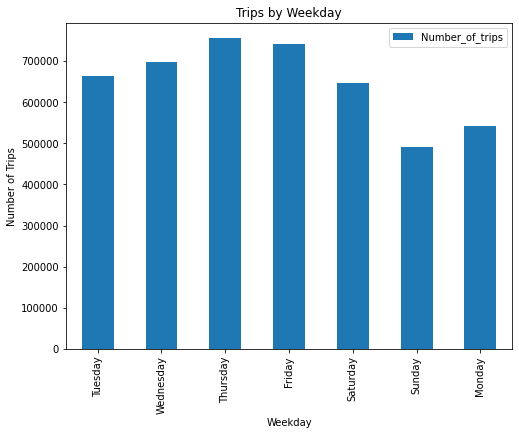

In [ ]:
df_weekday.plot(kind='bar', figsize=(8,6))

plt.ylabel('Number of Trips')
plt.title('Trips by Weekday')

plt.show()

#### Analysing the results

In [ ]:
#Getting the minimum number of trips by weekday
min_number_of_trips_weekday = min(df_weekday['Number_of_trips'])

#Getting the weekday where the number of trips is minimal
min_weekday = df_weekday[df_weekday['Number_of_trips'] == min_number_of_trips_weekday].index[0]

print('The lowest number of trips by weekday is {} trip, that corresponds to {}.'.format(min_number_of_trips_weekday, min_weekday))


The lowest number of trips by weekday is 490180 trip, that corresponds to Sunday.


In [ ]:
#Getting the mean number of trips in the weekend - Non working day
mean_number_of_trips_weekend = ((df_weekday.loc['Saturday'] + df_weekday.loc['Sunday']) / 2).values

#Getting the mean number of trips for the rest of the week- Working day
mean_number_of_trips_workday = (((df_weekday.loc['Monday'] + df_weekday.loc['Tuesday'] + df_weekday.loc['Wednesday'] + df_weekday.loc['Thursday'] + df_weekday.loc['Friday'])/ 5).values)[0]

ratio_weekday = (((mean_number_of_trips_workday - mean_number_of_trips_weekend) / mean_number_of_trips_weekend) * 100)[0]
ratio_weekday = round(ratio_weekday, 1)

print('The mean number of trips during working days is {}% higher than the mean number of trips during weekends.'.format(ratio_weekday))

The mean number of trips during working days is 19.6% higher than the mean number of trips during weekends.


###As the ratio between workdays and weekends only 19.6%, and because of the low number of trips on Monday, it cannot be said that people use Uber on workdays more than on weekends.

##We need to investigate more to find out why the number of trips on mondays is as low.

### 2.4 Trips by day

In [ ]:
#Grouping by Day
df_day_grouped = df.groupby(['Day']).count()

#Creating the grouped DataFrame
df_day = pd.DataFrame({'Number_of_trips':df_day_grouped.values[:,0]}, index = df_day_grouped.index) 

df_day.head()

Number_of_trips
Day                 
1             127430
2             143201
3             142983
4             140923
5             147054

#### Plotting the results

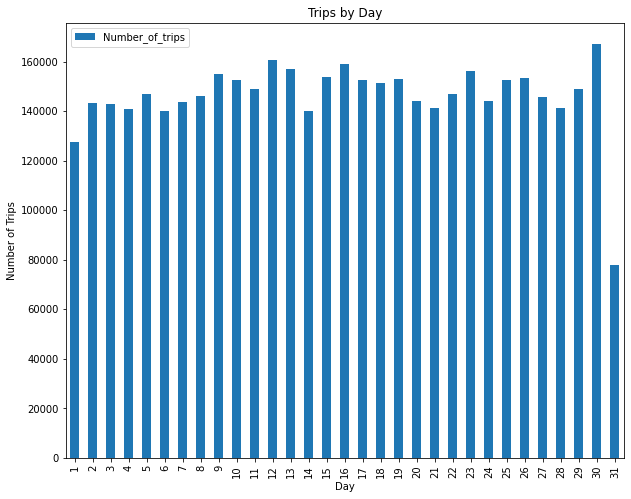

In [ ]:
df_day.plot(kind='bar', figsize=(10,8))

plt.ylabel('Number of Trips')
plt.title('Trips by Day')

plt.show()

#### Analysing the results

###The number of trips for the day 31 is a lot less than the others because April, June and September have 30 days.

###The day with the highest number of trips is the 30. There's not much variation from day to day.

### 2.5 Trips by hour and month

In [ ]:
#Grouping by Hour and Month
df_hour_month_grouped = df.groupby(['Hour','Month']).count()

#Creating the grouped DataFrame
df_hour_month = pd.DataFrame({'Number_of_trips':df_hour_month_grouped.values[:,1]}, index = df_hour_month_grouped.index) 

df_hour_month.head(10)

Number_of_trips
Hour Month                     
0    April                11910
     August               21451
     July                 17953
     June                 14514
     May                  13875
     September            24133
1    April                 7769
     August               14471
     July                 11527
     June                  9167

In [ ]:
#Reseting the Index
df_hour_month.reset_index(inplace= True)
df_hour_month.head()

Hour   Month  Number_of_trips
0     0   April            11910
1     0  August            21451
2     0    July            17953
3     0    June            14514
4     0     May            13875

In [ ]:
#Preparing the Number of trips data
#We create a Numpy array that includes the Number of trips data then reshape it to fit our 
data_hour_month = df_hour_month['Number_of_trips'].values.reshape(24,6)
data_hour_month

array([[11910, 21451, 17953, 14514, 13875, 24133],
       [ 7769, 14471, 11527,  9167,  8186, 16107],
       [ 4935, 10105,  8562,  6189,  5372, 10702],
       [ 5040, 10376,  9199,  6937,  5946, 10789],
       [ 6095, 11774, 10040,  7701,  6945, 12675],
       [ 9476, 16525, 14932, 11955, 10789, 20262],
       [18498, 24907, 23456, 22030, 21015, 33307],
       [24924, 34064, 32545, 30834, 27413, 43314],
       [22843, 34566, 33387, 29771, 25460, 44477],
       [17939, 30195, 28486, 24298, 20507, 38542],
       [17865, 30706, 28558, 23584, 20801, 37634],
       [18774, 31778, 30120, 24155, 22055, 38821],
       [19425, 32106, 30900, 25233, 23595, 39193],
       [22603, 35764, 35832, 28937, 27699, 45042],
       [27190, 40644, 41357, 34428, 34363, 52643],
       [35324, 48197, 46053, 41586, 43087, 61219],
       [42003, 53481, 52403, 48162, 49127, 68224],
       [45475, 57122, 58260, 50452, 51508, 73373],
       [43003, 55390, 57268, 45013, 48965, 75040],
       [38923, 53008, 52332, 38

In [ ]:
df_hour_month = pd.DataFrame(data = data_hour_month, index = df_hour_month['Hour'].unique(), columns = df['Month'].unique())
df_hour_month.head()

April    May   June   July  August  September
0  11910  21451  17953  14514   13875      24133
1   7769  14471  11527   9167    8186      16107
2   4935  10105   8562   6189    5372      10702
3   5040  10376   9199   6937    5946      10789
4   6095  11774  10040   7701    6945      12675

#### Plotting the results

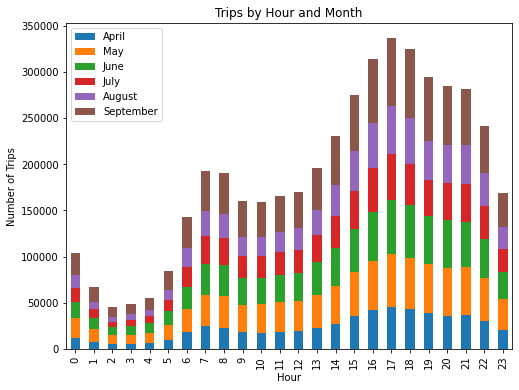

In [ ]:

#Staccked Bar plot
df_hour_month.plot(kind='bar', figsize=(8,6), stacked=True)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

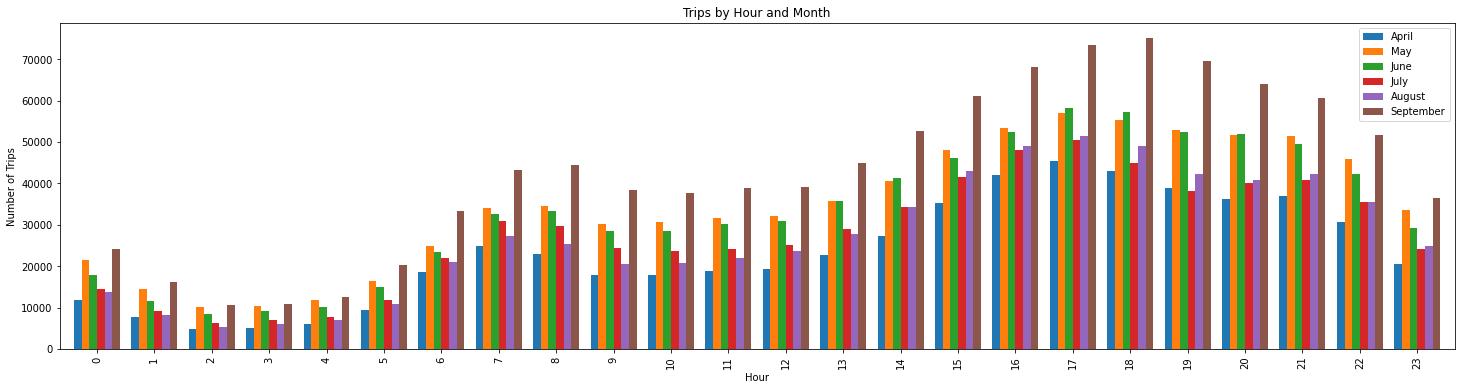

In [ ]:
## Width Bar plot
df_hour_month.plot(kind='bar', figsize=(25,6),width=0.8)

plt.xlabel('Hour')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Month')

plt.show()

### 2.6 Trips by weekday and hour

In [ ]:
#Grouping by Hour and weekday
df_weekday_hour_grouped = df.groupby(['Weekday','Hour'], sort = False).count()

#Creating the grouped DataFrame
df_weekday_hour = pd.DataFrame({'Number_of_trips':df_weekday_hour_grouped.values[:,1]}, index = df_weekday_hour_grouped.index) 

df_weekday_hour

Number_of_trips
Weekday Hour                 
Tuesday 0                6237
        1                3509
        2                2571
        3                4494
        4                7548
...                       ...
Monday  19              34159
        20              32849
        21              28925
        22              20158
        23              11811

[168 rows x 1 columns]

In [ ]:
#Reseting the Index
df_weekday_hour.reset_index(inplace= True)

#Preparing the Number of trips data
data_weekday_hour = df_weekday_hour['Number_of_trips'].values.reshape(7,24)

# df_weekday_hour = pd.DataFrame(data = data_weekday_hour, index = df_weekday_hour['Weekday'].unique(), columns = df['Hour'].unique())
df_weekday_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Weekday          168 non-null    object
 1   Hour             168 non-null    int64 
 2   Number_of_trips  168 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.1+ KB


In [ ]:
df_weekday_hour.head()

Weekday  Hour  Number_of_trips
0  Tuesday     0             6237
1  Tuesday     1             3509
2  Tuesday     2             2571
3  Tuesday     3             4494
4  Tuesday     4             7548

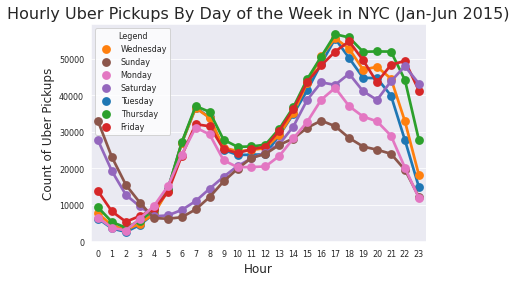

In [ ]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import seaborn as sns
figb , axp = plt.subplots()
sns.set_style('whitegrid')
axp = sns.pointplot(x="Hour", y="Number_of_trips", hue="Weekday", data=df_weekday_hour)
handles,labels = axp.get_legend_handles_labels()
#reordering legend content
handles = [handles[1], handles[5], handles[6], handles[4], handles[0], handles[2], handles[3]]
labels = [labels[1], labels[5], labels[6], labels[4], labels[0], labels[2], labels[3]]
axp.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
axp.set_xlabel('Hour', fontsize = 12)
axp.set_ylabel('Count of Uber Pickups', fontsize = 12)
axp.set_title('Hourly Uber Pickups By Day of the Week in NYC (Jan-Jun 2015)', fontsize=16)
axp.tick_params(labelsize = 8)
axp.legend(handles,labels,loc=0, title="Legend", prop={'size':8})
axp.get_legend().get_title().set_fontsize('8')
plt.show()

#### Plotting the results

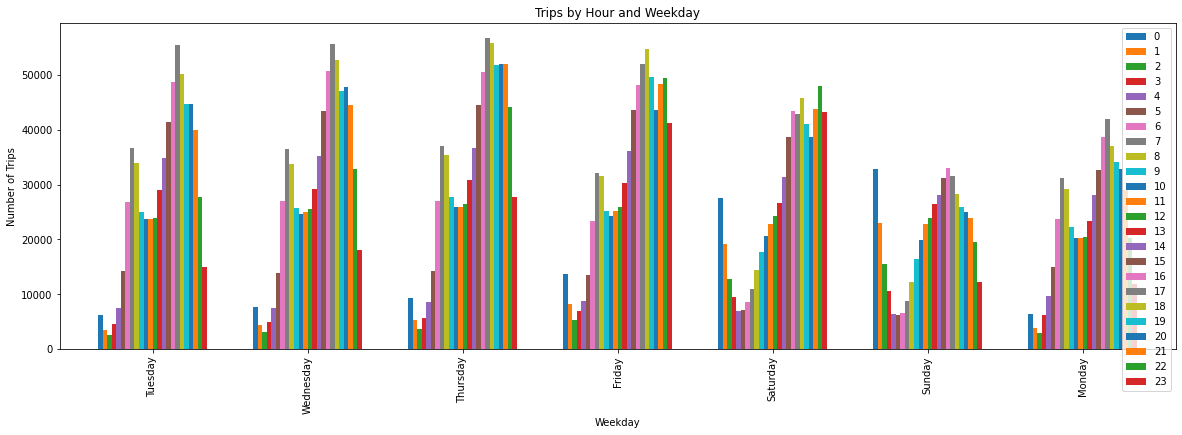

In [ ]:
df_weekday_hour.plot(kind='bar', figsize=(20,6), width = 0.7)

plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.title('Trips by Hour and Weekday')

plt.show()

#### Analysing the results

###**We see that in working days there's a pulse at 7:00 and 8:00, it corresponds to the hour where the employees go to work. This pulse is not present on weekend days.**

###**At the same time we see that on weekend days the number of trips around midnight, 1:00 and 2:00 is higher than on working days.**

### 2.7 Trips by weekday and month


In [ ]:
#Grouping by Weekday and Month
df_month_weekday_grouped = df.groupby(['Month','Weekday'], sort=False).count()

#Creating the grouped DataFrame
df_month_weekday = pd.DataFrame({'Number_of_trips':df_month_weekday_grouped.values[:,1]}, index = df_month_weekday_grouped.index) 

df_month_weekday.head(10)

Number_of_trips
Month Weekday                   
April Tuesday              91185
      Wednesday           108631
      Thursday             85067
      Friday               90303
      Saturday             77218
      Sunday               51251
      Monday               60861
May   Thursday            128921
      Friday              133991
      Saturday            102990

In [ ]:
#Reseting the Index
df_month_weekday.reset_index(inplace= True)

#Preparing the Number of trips 
data_month_weekday = df_month_weekday['Number_of_trips'].values.reshape(6,7)

df_month_weekday = pd.DataFrame(data = data_month_weekday, index = df_month_weekday['Month'].unique(), columns = df['Weekday'].unique())
df_month_weekday.head()

Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
April     91185     108631     85067   90303     77218   51251   60861
May      128921     133991    102990   56168     63846   76662   89857
June      79656      94655     88134   99654    115325  105056   81364
July     137454     147717    148439  102735     90260   76327   93189
August   148674     132225    110246   91633    107124  115256  124117

#### Plotting the results

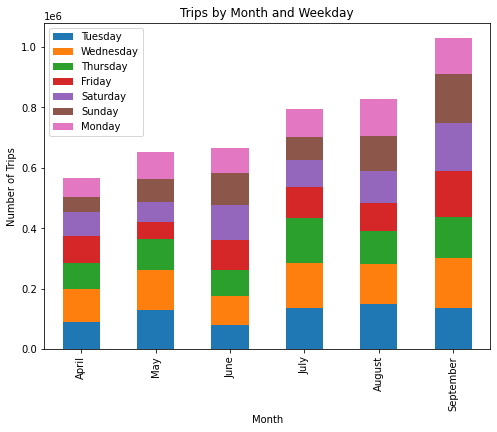

In [ ]:
df_month_weekday.plot(kind='bar', figsize=(8,6), stacked = True)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

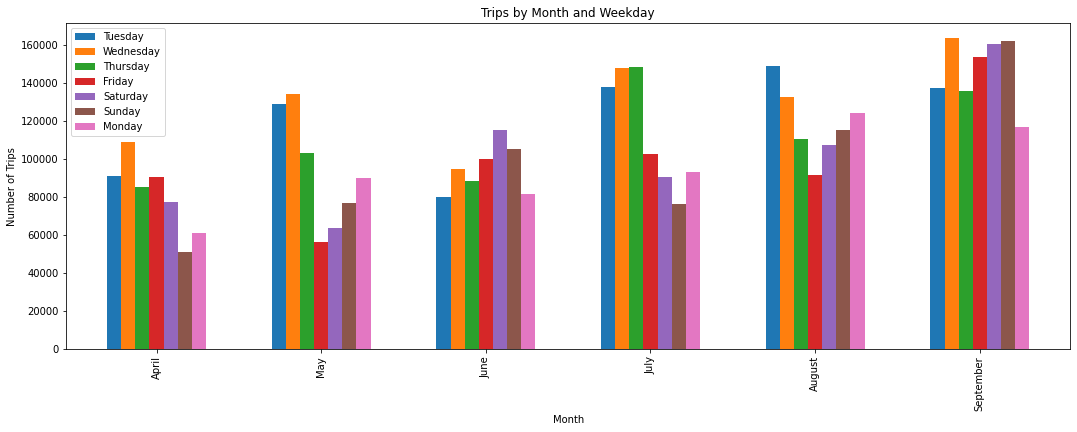

In [ ]:

df_month_weekday.plot(kind='bar', figsize=(18,6), width = 0.6)

plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month and Weekday')

plt.show()

# 3. Conclusion

**Through our analysis of the Uber Pickups in New York City data set in 2014, we managed to get the following informations:**
- The peak demand hour 17:00.
- **The main customer category are workers.**
- An indicator of Uber's improvement from April to September.
- People tend to use Uber to go to work around 7:00 and 8:00 on working days.
- People tend to use Uber late at night (around midnight) during weekends.
- We should investigate why people don't use uber on Mondays as much as they do on other working days.

**We plan to use more adapted tools in the future, such as heatmaps and machine learning algorithms in order to extract more insights.**

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 11 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (1,162 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144628 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-

In [ ]:
!pip install pyproj==1.9.6

     |████████████████████████████████| 2.8MB 2.1MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702113 sha256=70986b10d171eba3f978109ebcae67767cd1e4a91c53e8e12b0db7cbe874f5f4
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.1.post1
    Uninstalling pyproj-2.6.1.post1:
      Successfully uninstalled pyproj-2.6.1.post1


# Uber Data Analysis using Python-**PHASE II**
**bold text**



It contains more in depth visualizations **( Heatmaps, spatial visualizations and animation )** of the Uber Pickups in New York City data set.

The analysis is broken up into 3 sections:
- Data Loading and Preparation ( same as the " Uber Basic Data Analysis " notebook ).
- Cross Analysis through heatmaps.
- Spatial visualization and animation.


### 1.1 Loading Modules

In [ ]:
import pandas as pd
import numpy as np

#Visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

#The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python
from mpl_toolkits.basemap import Basemap
from matplotlib import cm #Colormap

#Animation Modules
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

%matplotlib inline

## 2 Cross Analysis
Through our exploration we are going to visualize:
- Heatmap by Hour and Day.
- Heatmap by Hour and Weekday.
- Heatmap by Month and Day.
- Heatmap by Month and Weekday.

In [ ]:
#Defining a function that counts the number of rows
def count_rows(rows):
    return len(rows)

### 2.1 Heatmap by Hour and Day

In [ ]:
#Creating the hour and day dataframe
df_hour_day = df.groupby('Hour Day'.split()).apply(count_rows).unstack()
df_hour_day.head()

Day     1     2     3     4     5     6   ...    26    27    28    29    30    31
Hour                                      ...                                    
0     3247  2480  3415  2944  2786  4623  ...  3887  5304  4224  2732  2439  2209
1     1982  1600  2176  1718  1567  2932  ...  3123  3712  2711  1862  1547  1407
2     1284  1109  1434  1217  1047  1902  ...  2087  2407  1894  1442  1135  1107
3     1331  1442  1489  1449  1278  1599  ...  1840  2098  1846  1717  1436   935
4     1458  1897  1578  1737  1648  1584  ...  1770  1759  1916  1990  1864   788

[5 rows x 31 columns]

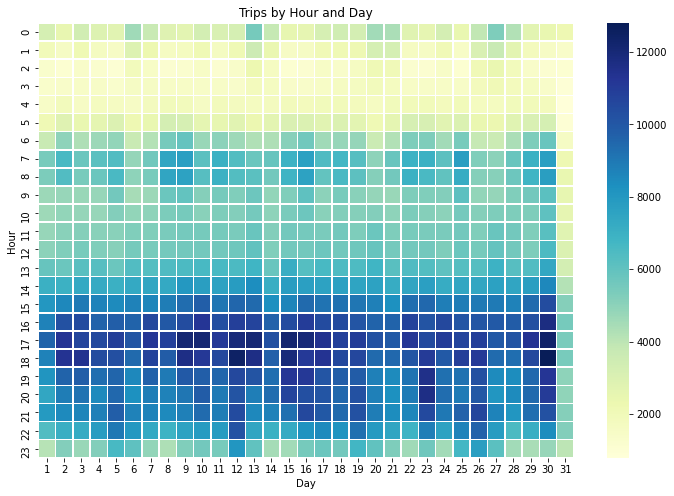

In [ ]:
plt.figure(figsize = (12,8))

#Using the seaborn heatmap function 
ax = sns.heatmap(df_hour_day, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Day");

#### Analysing the results
**We see that the number of trips in increasing throughout the day, with a peak demand in the evening between 16:00 and 18:00.**

It corresponds to the time where employees finish their work and go home.

### 2.2 Heatmap by Hour and Weekday

In [ ]:
df_hour_weekday = df.groupby('Hour Weekday'.split(), sort = False).apply(count_rows).unstack()
df_hour_weekday.head()

Weekday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
Hour                                                                   
0           6237       7644      9293   13716     27633   32877    6436
1           3509       4324      5290    8163     19189   23015    3737
2           2571       3141      3719    5350     12710   15436    2938
3           4494       4855      5637    6930      9542   10597    6232
4           7548       7511      8505    8806      6846    6374    9640

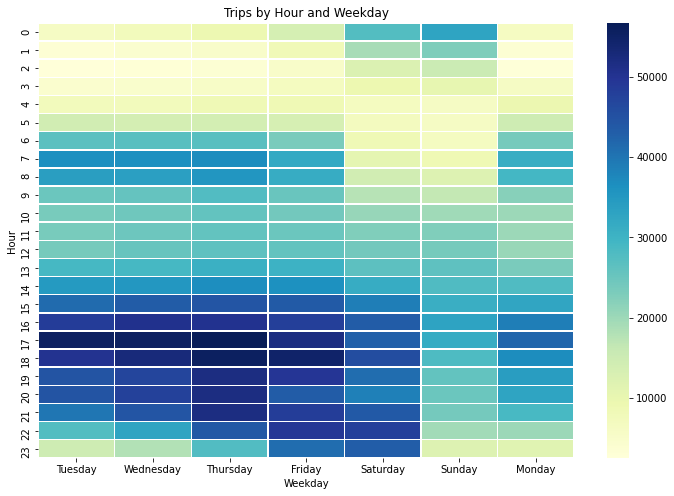

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_hour_weekday, cmap=cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Hour and Weekday");

#### Analysing the results
##**We can see that on working days (From Monday to Friday) the number of trips is higher from 16:00 to 21:00. It shows even better what we said from the first heatmap.**

##**On Friday the number of trips remains high until 23:00 and continues on early Saturday. It corresponds to the time where people come out from work, then go out for dinner or drink before the weekend.**

##**We can notice the same pattern on Saturday, people tend to go out at night, the number of trips remains on high until early Sunday.**

### 2.3 Heatmap by Day and Month

In [ ]:
df_day_month = df.groupby('Day Month'.split(), sort = False).apply(count_rows).unstack()
df_day_month.head()

Month    April      May     June     July   August  September
Day                                                          
1      14546.0  23375.0  15967.0  21228.0  32353.0    19961.0
2      17474.0  24235.0  17503.0  26480.0  28678.0    28831.0
3      20701.0  22234.0  22674.0  21597.0  23146.0    32631.0
4      26714.0  13918.0  22831.0  14148.0  24952.0    38360.0
5      19521.0  17859.0  28371.0  10890.0  28094.0    42319.0

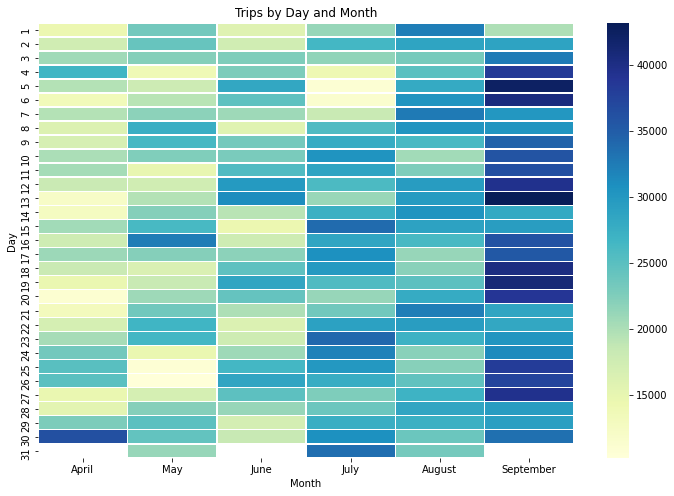

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_day_month, cmap = cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Day and Month");

#### Analysing the results
**We observe that the number of trips increases each month, we can say that from April to September 2014, Uber was in a continuous improvement process.**

We can notice **from the visualization a dark spot**, it corresponds to the 30 April. The number of trips that day was extreme compared to the rest of the month.

**Unfortunatly we have not been able to find any factual information to explain the pulse. A successful marketing strategy can be assumed to be in place that days. So as the analysis go on we consider that day an outliner.**

In [ ]:
#The number of trips the 30th of April
max_april = max(df_day_month['April'])

#The mean number of trips the rest of April
mean_rest_april = df_day_month['April'][0:29].sum() / 29

ratio_april = round(max_april / mean_rest_april)
print('The number of trips the 30th of April is {} times higher than the mean number of trips during the rest of the month'.format(ratio_april))

The number of trips the 30th of April is 2.0 times higher than the mean number of trips during the rest of the month


### 2.4 Heatmap by Month and Weekday

In [ ]:
df_month_weekday = df.groupby('Month Weekday'.split(), sort = False).apply(count_rows).unstack()
df_month_weekday.head()

Weekday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday  Monday
Month                                                                  
April      91185     108631     85067   90303     77218   51251   60861
May        76662      89857    128921  133991    102990   56168   63846
June       88134      99654    115325  105056     81364   79656   94655
July      137454     147717    148439  102735     90260   76327   93189
August    107124     115256    124117  148674    132225  110246   91633

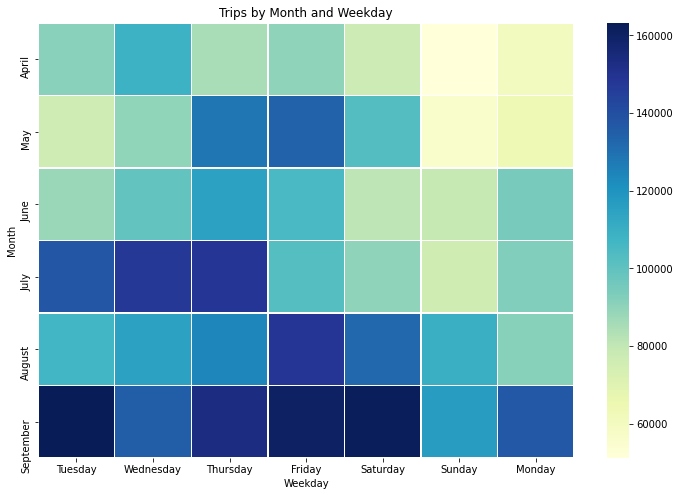

In [ ]:
plt.figure(figsize = (12,8))

ax = sns.heatmap(df_month_weekday, cmap= cm.YlGnBu, linewidth = .5)
ax.set(title="Trips by Month and Weekday");

## 3 Spatial Visualization

In [ ]:

#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df['Lon'].values
Latitudes  = df['Lat'].values

### 3.1 Scatter visualization
**For our first visualization we can reduce the need in computational power by dropping the duplicates in Latitude and Longitude.**

In [ ]:
df_reduced = df.drop_duplicates(['Lat','Lon'])

In [ ]:
# ratio_reduction = round((count_rows(df) - count_rows(df_reduced))/count_rows(df) * 100)
# print('The dataset has been reduced by {}%'.format(ratio_reduction))

In [ ]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df_reduced['Lon']
Latitudes_reduced  = df_reduced['Lat']

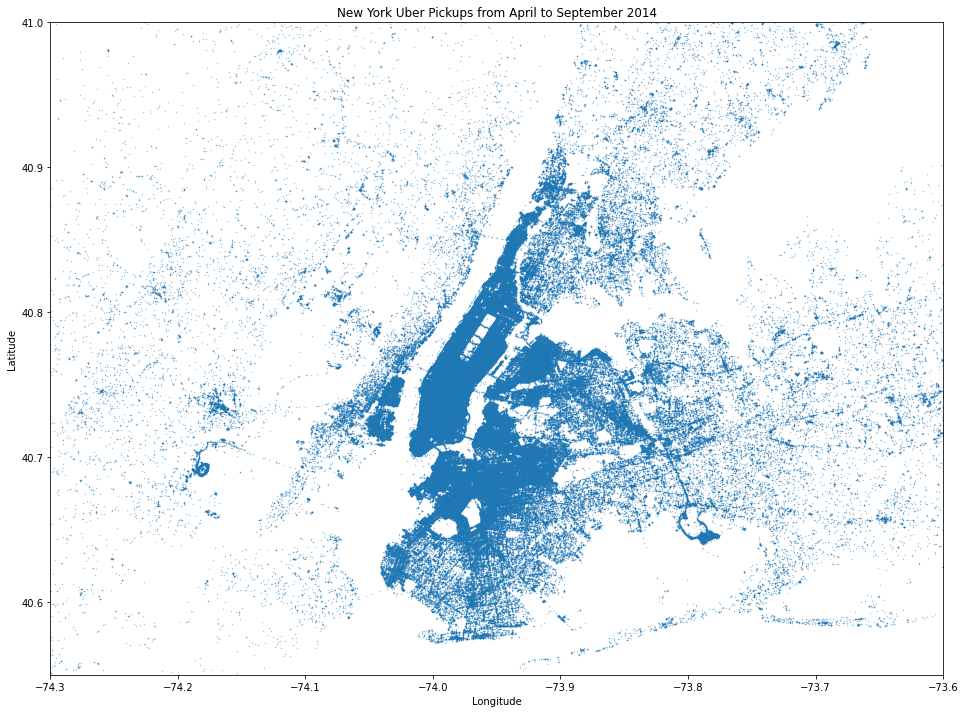

In [ ]:
%matplotlib inline

plt.figure(figsize=(16, 12))

plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)

plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('New York Uber Pickups from April to September 2014')

plt.show()

### 3.2 Heatmap visualization
This visualization is more demanding in computational power, since we can't use the reduce dataset if we want to get the number of pickups in the heatmap.
We will use Basemap to create the spacial heatmap.

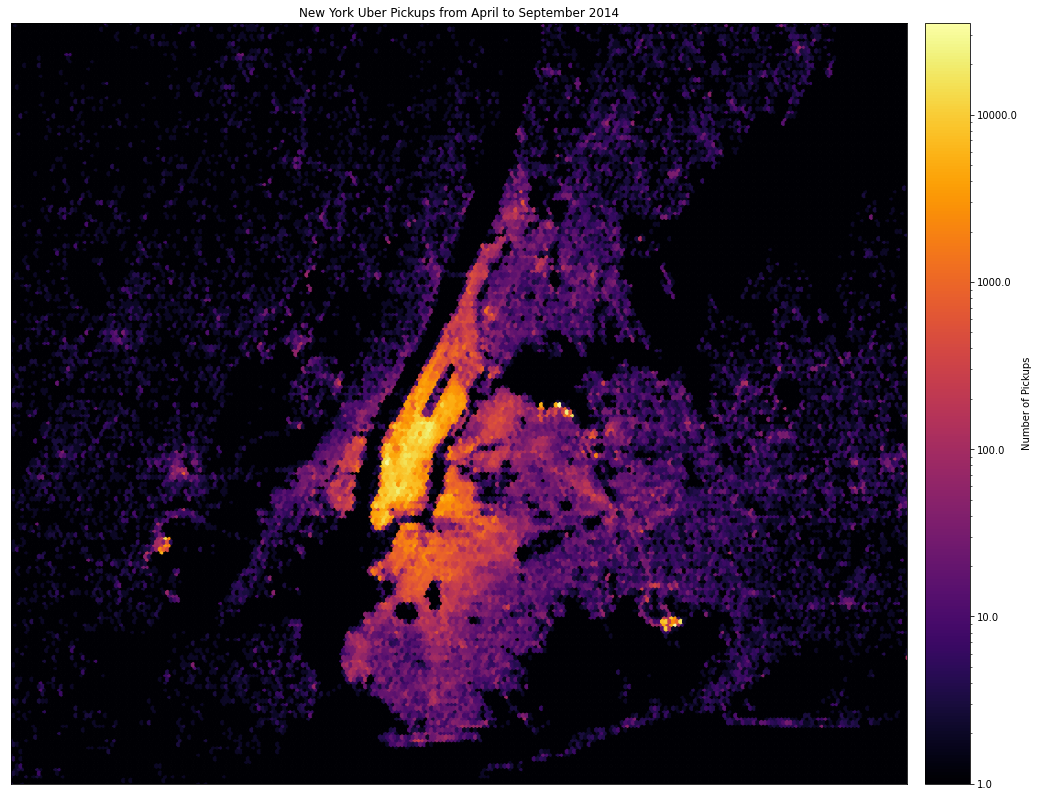

In [ ]:
plt.figure(figsize=(18, 14))
plt.title('New York Uber Pickups from April to September 2014')
 
#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');

### Analysing the results
From our spacial visualization we observe that:
- Most of Uber's trips in New York are made **from Midtown to Lower Manhattan.**
- Followed by Upper Manhattan and the Heights of Brooklyn.
- Lastly Jersey City and the rest of Brooklyn.

We see some brighter spots in our heatmap, corresponding to :
- LaGuardia **Airport** in East Elmhurst.
- John F. Kennedy International **Airport**.
- Newark Liberty International **Airport**.

We know **that many airports have specific requirements about where customers can be picked up by vehicles on the Uber platform. We can assume that these three airports have them, since they represent a big part of uber's business in new york**


# Base Station Analysis

In [ ]:
#BASE ANALYSIS:
base = df['Base'].value_counts()
base = base.to_frame()


In [ ]:
base.rename(columns = {'Base':'Number_of_trips'}, inplace = True) 
base['base'] = base.index

In [ ]:
import altair as alt

b1 = alt.Chart(base).mark_bar().encode(
    alt.X('base', title='base'),
    alt.Y('Number_of_trips',title='Number_of_trips')
).properties(
	title="Trip by Bases")



alt.Chart(...)

# Clustering Analyisis


In [ ]:
clus = df[['Lat','Lon']].values
print(len(clus))

4534327


In [ ]:
from sklearn.cluster import KMeans


In [ ]:
# '''Age and spending Score'''
# inertia = []
# for n in range(1 , 11):
#     algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
#                         tol=0.0001,  random_state= 111  , algorithm='elkan') )
#     algorithm.fit(clus)
#     inertia.append(algorithm.inertia_)

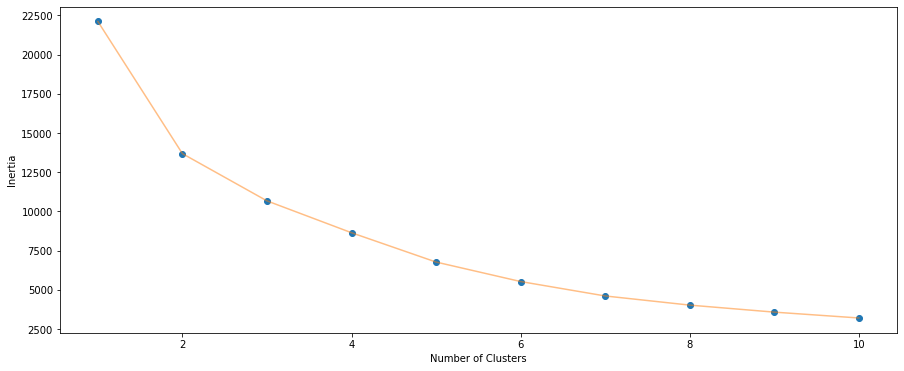

In [ ]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [ ]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(clus)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [ ]:
centroids1

array([[ 40.76649043, -73.97209818],
       [ 40.66538846, -73.76249056],
       [ 40.68750005, -73.96426561],
       [ 40.69836122, -74.20257751],
       [ 40.73136069, -73.99805303],
       [ 40.7965747 , -73.87295598]])

In [ ]:

#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6


In [ ]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df['Lon']
Latitudes_reduced  = df['Lat']

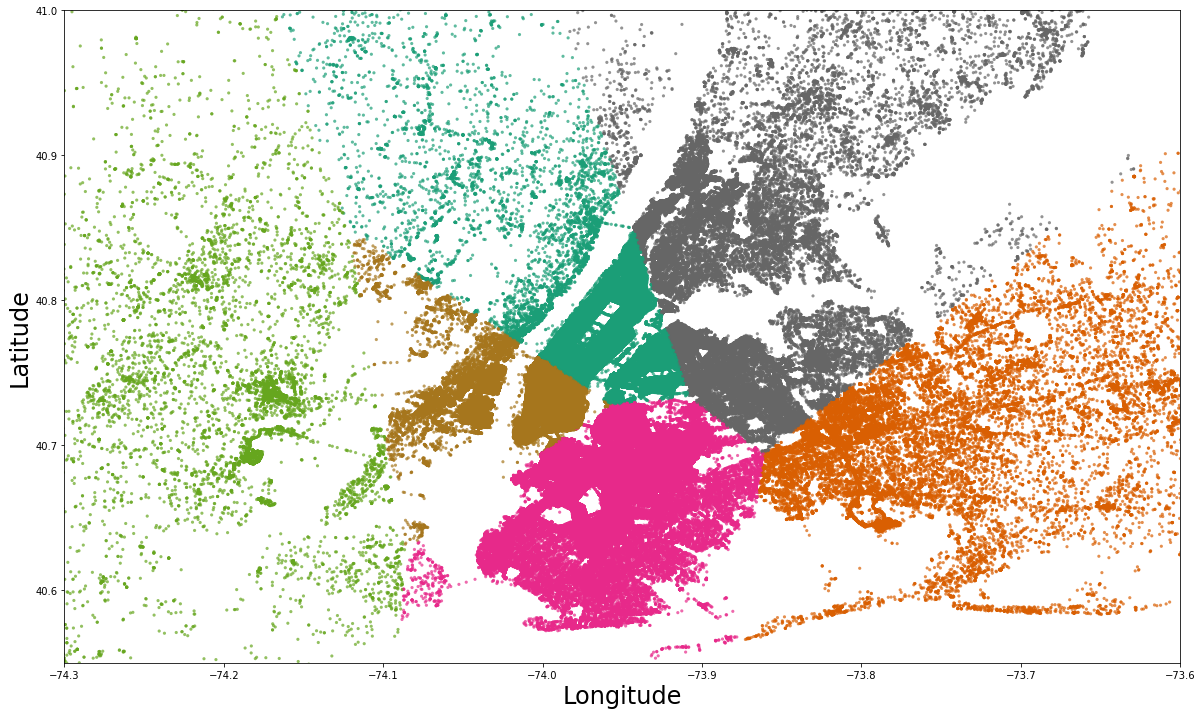

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig, ax = plt.subplots(figsize=[20, 12])
centroid_scatter = ax.scatter(centroids1[:, 0],centroids1[:, 1], marker="o", linewidths=2, c='c', s=120)
facility_scatter = ax.scatter(Longitudes_reduced, Latitudes_reduced, c=algorithm.predict(clus), cmap = cm.Dark2, edgecolor='None', alpha=0.7, s=10)
plt.ylim(top=top, bottom=bottom)
plt.xlim(left=left, right=right)
ax.set_xlabel('Longitude', fontsize=24)
ax.set_ylabel('Latitude', fontsize = 24)

plt.show()
# display(fig)

In [ ]:
cent = pd.DataFrame(data=centroids1,columns=["lat", "lon"])
cent.head()


lat        lon
0  40.766490 -73.972098
1  40.665388 -73.762491
2  40.687500 -73.964266
3  40.698361 -74.202578
4  40.731361 -73.998053

In [ ]:
import folium
# Converting centroid into lists
centroid = cent.values.tolist()
# Plotting the centroids on google map using Folium library.
map = folium.Map(location=[40.79658011772687, -73.87341741832425], zoom_start = 10)
for point in range(0, len(centroid)):
    folium.Marker(centroid[point], popup = folium.Popup(centroid[point])).add_to(map)
map

In [ ]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
SF_COORDINATES = (40.79658011772687, -73.87341741832425)
 
  
# create empty map zoomed in on San Francisco
map = folium.Map(location=SF_COORDINATES, zoom_start=10)
marker_cluster = MarkerCluster().add_to(map)
cc = df[['Lat','Lon']] 
# add a marker for every record in the filtered data, use a clustered view
for each in cc.iterrows():
    folium.Marker(
        location = [each[1]['Lat'],each[1]['Lon']]).add_to(marker_cluster)
  
display(map)

# Lyft

In [ ]:
import pandas as pd
lyft  = pd.read_csv("/content/other-Lyft_B02510.csv")
lyft = lyft[['start_lat','start_lng']] 
lyft.dropna()
lyft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267701 entries, 0 to 267700
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   start_lat  267700 non-null  float64
 1   start_lng  267700 non-null  float64
dtypes: float64(2)
memory usage: 4.1 MB


In [ ]:
lyft=lyft.dropna(subset=['start_lat'])

lyft=lyft.dropna(subset=['start_lng'])

# lyft = lyft.drop_duplicates()
lyft_lan = lyft['start_lat']
lyft_lng = lyft['start_lng']

In [ ]:

#Setting up the limits
top, bottom, left, right = 41, 40.55, -74.3, -73.6

#Extracting the Longitude and Latitude of each pickup in our dataset
Longitudes = df['Lon'].values
Latitudes  = df['Lat'].values

In [ ]:
df_reduced = df.drop_duplicates(['Lat','Lon'])

In [ ]:
# ratio_reduction = round((count_rows(df) - count_rows(df_reduced))/count_rows(df) * 100)
# print('The dataset has been reduced by {}%'.format(ratio_reduction))

In [ ]:
#Extracting the Longitude and Latitude of each pickup in our reduced dataset
Longitudes_reduced = df_reduced['Lon']
Latitudes_reduced  = df_reduced['Lat']


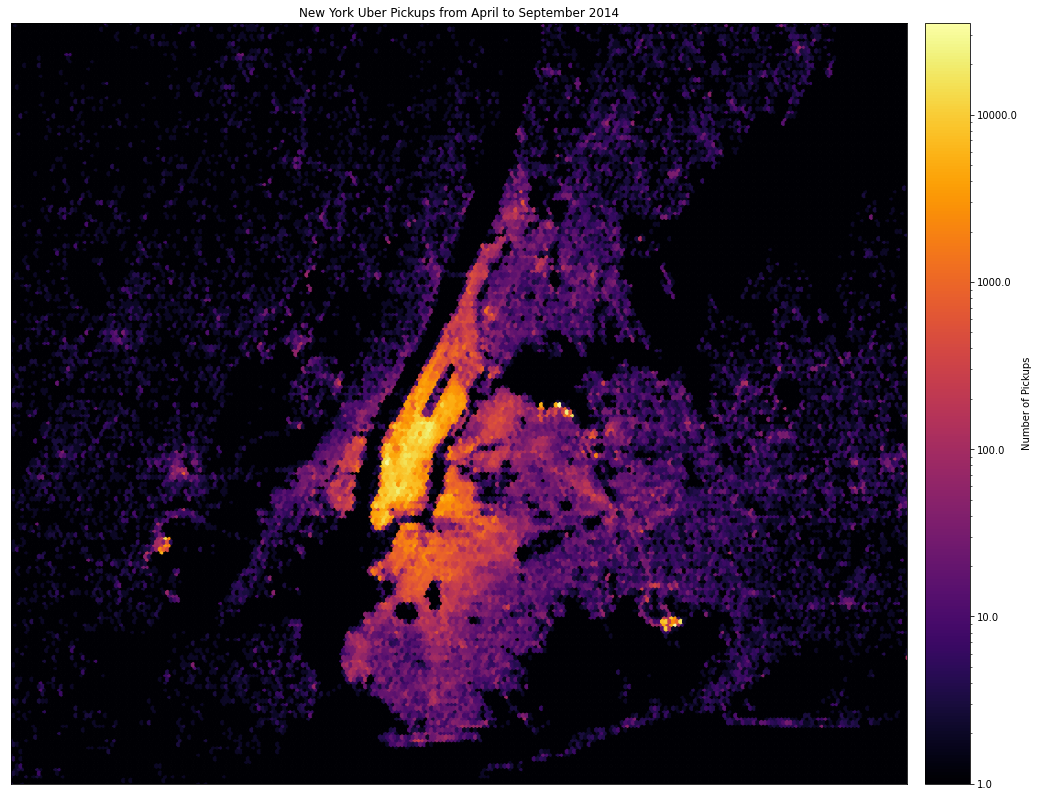

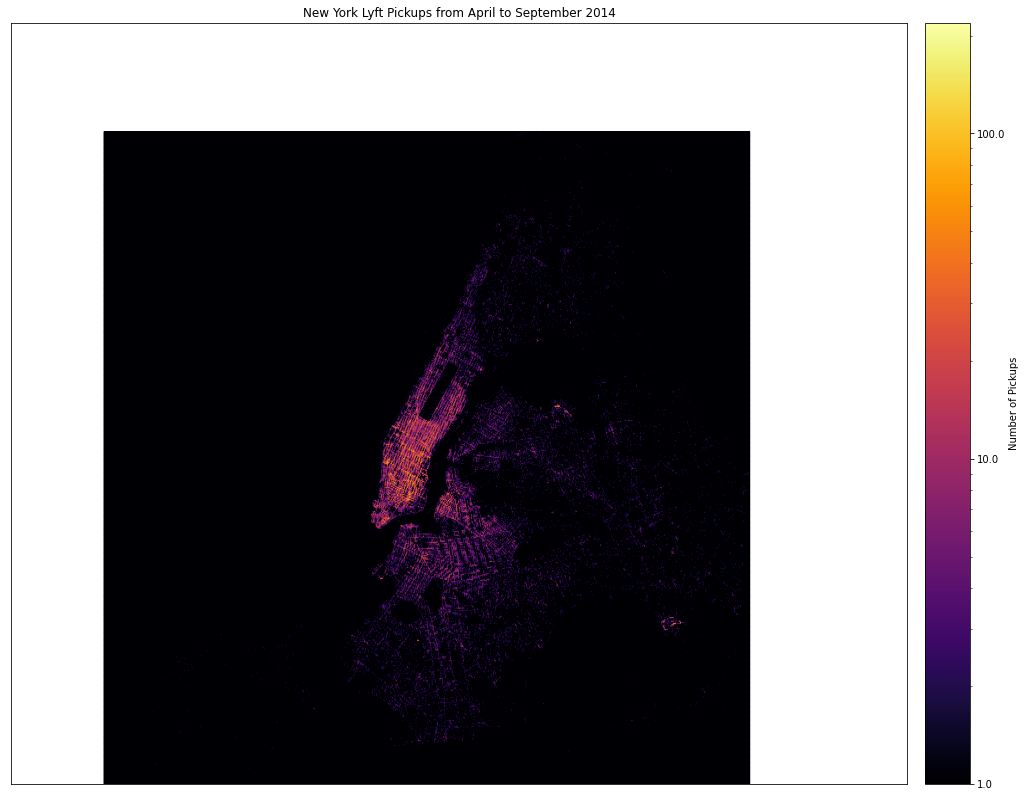

In [ ]:
# %matplotlib inline

# plt.figure(figsize=(16, 12))
# plt.plot(Longitudes_reduced, Latitudes_reduced, '.', ms=.8, alpha=.5)
# # plt.plot(lyft['start_lng'],lyft['start_lat'],'D',ms=.8,alpha=.5)

# plt.ylim(top=top, bottom=bottom)
# plt.xlim(left=left, right=right)


# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('New York Uber Pickups from April to September 2014')

# plt.show()

# %matplotlib inline

# plt.figure(figsize=(16, 12))
# plt.plot(lyft['start_lng'],lyft['start_lat'],'D',c='r',ms=.8,alpha=.5)

# plt.ylim(top=top, bottom=bottom)
# plt.xlim(left=left, right=right)


# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('New York Lyft Pickups from April to September 2014')

# plt.show()


plt.figure(figsize=(18, 14))
plt.title('New York Uber Pickups from April to September 2014')
 
#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(Longitudes, Latitudes)
map.hexbin(x, y, gridsize=1000, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');






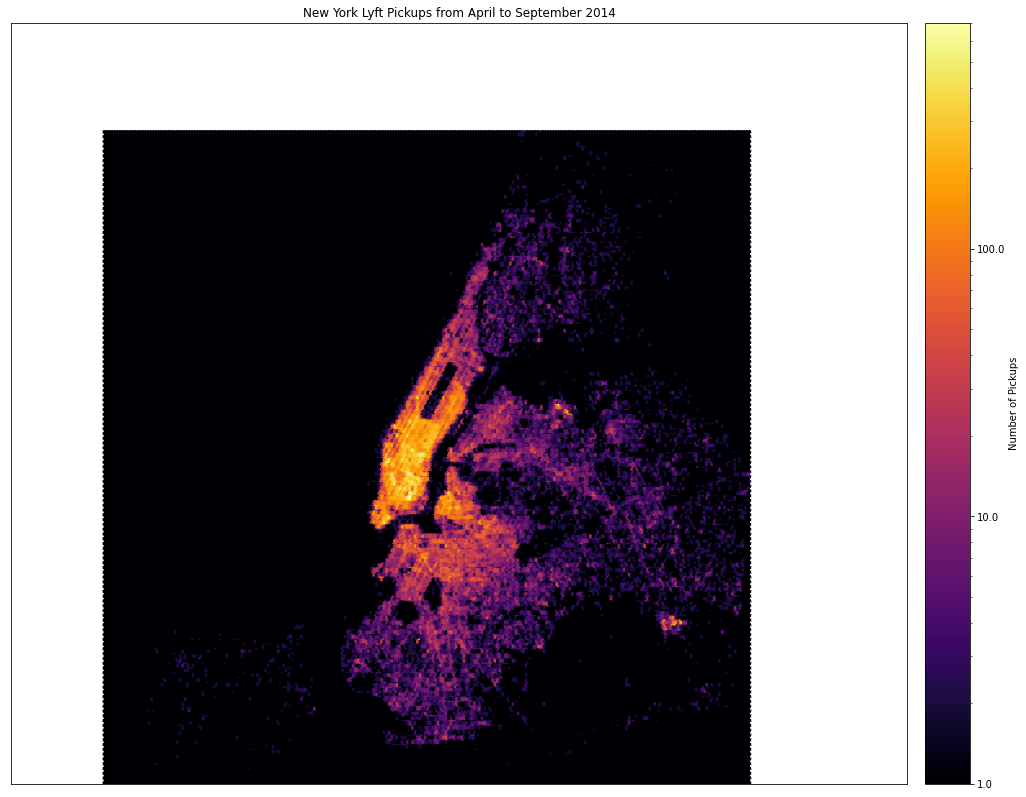

In [ ]:


plt.figure(figsize=(18, 14))
plt.title('New York Lyft Pickups from April to September 2014')
 
#https://matplotlib.org/basemap/api/basemap_api.html
map = Basemap(projection='merc', urcrnrlat=top, llcrnrlat=bottom, llcrnrlon=left, urcrnrlon=right)
x, y = map(lyft_lng, lyft_lan)
map.hexbin(x, y, gridsize=250, bins='log', cmap=cm.inferno)
map.colorbar(location='right', format='%.1f', label='Number of Pickups');


In [ ]:

# import folium
# import pandas as pd
# from folium.plugins import MarkerCluster
# SF_COORDINATES = (40.79658011772687, -73.87341741832425)
 
  
# # create empty map zoomed in on San Francisco
# map = folium.Map(location=SF_COORDINATES, zoom_start=10)
# marker_cluster = MarkerCluster().add_to(map)

# # add a marker for every record in the filtered data, use a clustered view
# for each in range(len(lyft)):
#     folium.Marker(
#         location = [lyft.iloc[each,0],lyft.iloc[each,1]]).add_to(marker_cluster)
  
# display(map)

# UBER VS OTHER BUSINESSES


In [ ]:
# Reading All Files
# Uber Data
df_uber_april = pd.read_csv('../input/uber-raw-data-apr14.csv')
df_uber_may = pd.read_csv('../input/uber-raw-data-may14.csv')
df_uber_june = pd.read_csv('../input/uber-raw-data-jun14.csv')
df_uber_july = pd.read_csv('../input/uber-raw-data-jul14.csv')
df_uber_aug = pd.read_csv('../input/uber-raw-data-aug14.csv')
df_uber_sept = pd.read_csv('../input/uber-raw-data-sep14.csv')
df_uber_janjune_2015 = pd.read_csv('../input/uber-raw-data-janjune-15.csv')

# Other Companies Data
df_Dial7 = pd.read_csv('../input/other-Dial7_B00887.csv')
df_Lyft = pd.read_csv('../input/other-Lyft_B02510.csv')
df_Skyline = pd.read_csv('../input/other-Skyline_B00111.csv')
df_FHV = pd.read_csv('../input/other-FHV-services_jan-aug-2015.csv')
df_Federal = pd.read_csv('../input/other-Federal_02216.csv')
df_American = pd.read_csv('../input/other-American_B01362.csv')

# Renaming Time Columns for symmetry
df_uber_janjune_2015.rename(columns={'Pickup_date': 'Date/Time'}, inplace=True)
df_Dial7.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_Lyft.rename(columns={'time_of_trip': 'Date/Time'}, inplace=True)
df_Skyline.rename(columns={'Date': 'Date/Time'}, inplace=True)
df_American.rename(columns={'DATE': 'Date/Time'}, inplace=True)
df_Federal.rename(columns={'Date': 'Date/Time'}, inplace=True)

# Standardizing Date Format
#     Saving Processing time by 40x by predefining format of date. Else it takes hours just to process dates 
df_uber_april = pd.DataFrame(pd.to_datetime(df_uber_april['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
df_uber_may = pd.DataFrame(pd.to_datetime(df_uber_may['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
df_uber_june = pd.DataFrame(pd.to_datetime(df_uber_june['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
df_uber_july = pd.DataFrame(pd.to_datetime(df_uber_july['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
df_uber_aug = pd.DataFrame(pd.to_datetime(df_uber_aug['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
df_uber_sept = pd.DataFrame(pd.to_datetime(df_uber_sept['Date/Time'],format = '%m/%d/%Y %H:%M:%S').dt.date)
df_uber_janjune_2015 = pd.DataFrame(pd.to_datetime(df_uber_janjune_2015['Date/Time'],format = '%Y/%m/%d %H:%M:%S').dt.date)
df_Dial7 = pd.DataFrame(pd.to_datetime(df_Dial7['Date/Time'],format = '%Y.%m.%d').dt.date)
df_Lyft = pd.DataFrame(pd.to_datetime(df_Lyft['Date/Time'],format = '%m/%d/%Y %H:%M').dt.date)
df_Skyline = pd.DataFrame(pd.to_datetime(df_Skyline['Date/Time'],format = '%m/%d/%Y').dt.date)
df_Federal = pd.DataFrame(pd.to_datetime(df_Federal[(df_Federal.Status == 'Arrived') | (df_Federal.Status == 'Assigned')]['Date/Time'],format = '%m/%d/%Y').dt.date)
df_American = pd.DataFrame(pd.to_datetime(df_American['Date/Time'],format = '%m/%d/%Y').dt.date)

# Adding Company Names for identification in the mixed dataset
df_uber_april['company'] = 'Uber'
df_uber_may['company'] = 'Uber'
df_uber_june['company'] = 'Uber'
df_uber_july['company'] = 'Uber'
df_uber_aug['company'] = 'Uber'
df_uber_sept['company'] = 'Uber'
df_uber_janjune_2015['company'] = 'Uber'
df_Dial7['company'] = 'Dial7'
df_Lyft['company'] = 'Lyft'
df_Skyline['company'] = 'Skyline'
df_Federal['company'] = 'Federal'
df_American['company'] = 'American'

# Combining All Data
df_all = pd.DataFrame()
# Uber Data
df_all = df_all.append(df_uber_april)
df_all = df_all.append(df_uber_may)
df_all = df_all.append(df_uber_june)
df_all = df_all.append(df_uber_july)
df_all = df_all.append(df_uber_aug)
df_all = df_all.append(df_uber_sept)
df_all = df_all.append(df_uber_janjune_2015)
# Other Services Data
df_all = df_all.append(df_Dial7)
df_all = df_all.append(df_Lyft)
df_all = df_all.append(df_Skyline)
df_all = df_all.append(df_Federal)
df_all = df_all.append(df_American)

# Sorting All Values
df_all.sort_values('Date/Time',inplace=True)

# Converting All Values to Pandas datetime
df_all['Date/Time'] = pd.to_datetime(df_all['Date/Time'])

# Adding column of month for visualizations
df_all['month'] = df_all['Date/Time'].dt.month

# Uber Business vs other businesses
start_date = '2014/01/01'
end_date = '2014/12/31'
df = df_all[(df_all['Date/Time']>=start_date) & (df_all['Date/Time']<=end_date)]
df.groupby(['month','company']).count().unstack('company')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Uber Business vs Other Businesses (2014)');



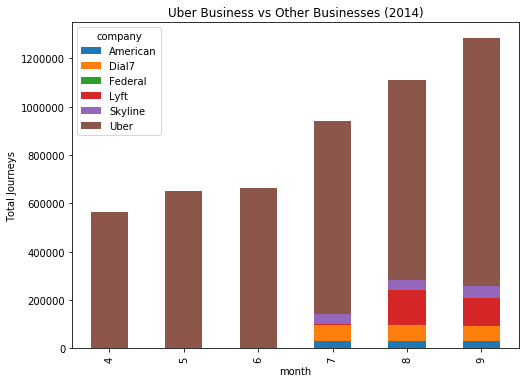

In [ ]:
# Individual Growth of Company Businesses in 2014
df.groupby(['month','company']).count().unstack('company')['Date/Time'].plot(figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Growth of Company Businesses (2014)');
plt.grid()

# Uber did not seem to hurt the business of other companies in 2014
# as all other companies experienced a growth in their business along with Uber

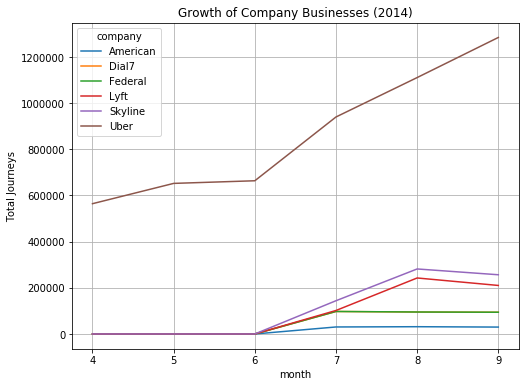

In [ ]:
# Uber Business in 2015
start_date = '2015/01/01'
end_date = '2015/12/31'
df = df_all[(df_all['Date/Time']>=start_date) & (df_all['Date/Time']<=end_date)]
df.groupby(['month','company']).count().unstack('company')['Date/Time'].plot(kind='bar', figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Uber Rides (2015)');

# Uber rides continued to grow in the first half of 2015 as well

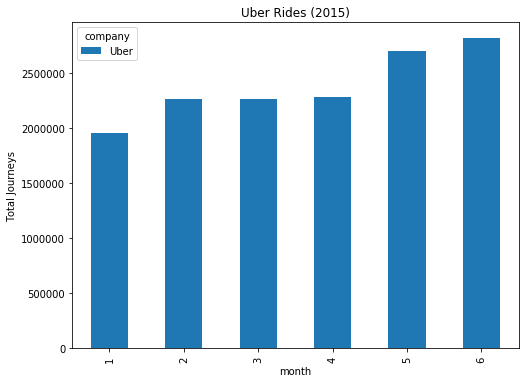

In [ ]:
# Individual Growth of Company Business in 2015
df.groupby(['month','company']).count().unstack('company')['Date/Time'].plot(figsize = (8,6),stacked=True)
plt.ylabel('Total Journeys')
plt.title('Growth of Company Business (2015)');
plt.grid()


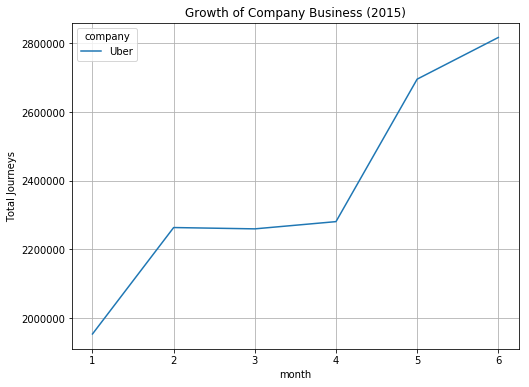

# Vehicle Analysis

In [ ]:
import pandas as pd
vehicle_data  = pd.read_csv("/content/Uber-Jan-Feb-FOIL.csv")

In [ ]:
vehicle_data.head()

dispatching_base_number      date  active_vehicles  trips
0                  B02512  1/1/2015              190   1132
1                  B02765  1/1/2015              225   1765
2                  B02764  1/1/2015             3427  29421
3                  B02682  1/1/2015              945   7679
4                  B02617  1/1/2015             1228   9537

In [ ]:
vehicle_data['Date_time'] = pd.to_datetime(vehicle_data['date'])

#Adding usufull colomns
vehicle_data['Month'] = vehicle_data['Date_time'].dt.month_name()
vehicle_data['Weekday'] = vehicle_data['Date_time'].dt.day_name()
vehicle_data['Day'] = vehicle_data['Date_time'].dt.day
vehicle_data['Trips_per_vehice'] = (vehicle_data['trips'] // vehicle_data['active_vehicles'])
vehicle_data.head()

dispatching_base_number      date  ...  Day  Trips_per_vehice
0                  B02512  1/1/2015  ...    1                 5
1                  B02765  1/1/2015  ...    1                 7
2                  B02764  1/1/2015  ...    1                 8
3                  B02682  1/1/2015  ...    1                 8
4                  B02617  1/1/2015  ...    1                 7

[5 rows x 9 columns]

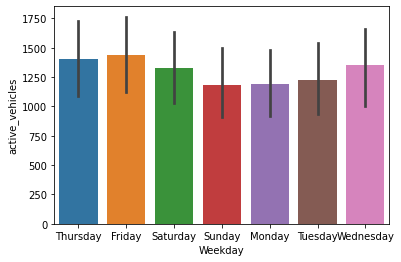

In [ ]:
import seaborn as sns
plt.figure(figsize = (12,8))
fig1 , ax = plt.subplots()
ax = sns.barplot(x='Weekday', y='active_vehicles', data=vehicle_data)
